In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Loading the data :
df = pd.read_csv('/musk_csv.csv')

In [34]:
# Viewing the data :
print(df.shape)
df.head(10)

(6598, 167)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
5,46,-194,-145,28,-117,72,57,-168,-39,-22,-319,-112,-104,-284,-283,-304,52,-153,-97,-225,-28,-22,3,180,49,-33,47,-88,21,79,-116,18,-11,5,-38,72,-175,3,-129,38,...,63,-1,-24,-14,-129,-74,-126,-222,-93,53,-72,-18,-33,-26,4,49,17,-177,-101,-119,-65,-80,52,-41,-27,-41,-141,76,-164,-239,-138,-156,56,143,142,164,-67,-145,40,1
6,47,-199,-106,28,-117,73,27,-104,-22,-23,-269,-210,-105,-285,-283,-302,-59,-74,-190,-226,-59,-13,-42,178,49,23,-21,-134,22,80,-116,15,-11,6,-37,73,-175,72,-109,69,...,64,0,-23,-18,-129,-62,-160,-204,-23,46,-118,-3,-32,-94,75,80,62,-177,-102,-120,-37,-109,39,-41,-27,-40,-143,74,-170,-238,-133,-153,55,144,142,165,-68,-145,37,1
7,41,-199,-101,22,-117,-6,26,-99,-21,-101,-293,-213,-229,-285,-281,-299,-56,-74,-187,-197,-62,-13,-40,75,49,22,-20,-136,33,95,-116,88,-24,42,-58,61,-171,72,-144,69,...,88,-21,-31,33,-128,-64,-164,-206,-23,45,-118,-2,-30,-90,76,80,62,-177,-102,-121,-37,-108,39,-41,-34,-32,-62,117,-2,-235,-59,-1,50,100,135,169,-60,-135,81,1
8,41,-199,-101,22,-117,-6,26,-100,-21,-101,-293,-213,-229,-285,-281,-299,-55,-74,-187,-196,-62,-13,-40,75,49,22,-20,-136,33,95,-116,88,-24,42,-58,61,-171,72,-144,69,...,88,-21,-32,33,-128,-64,-164,-206,-23,45,-118,-2,-30,-90,76,80,62,-177,-102,-121,-37,-108,40,-41,-34,-32,-62,117,-2,-235,-59,-1,50,100,135,169,-60,-135,81,1
9,47,-199,-106,28,-117,73,27,-104,-22,-23,-269,-210,-105,-285,-283,-302,-59,-74,-190,-226,-60,-13,-42,178,49,23,-21,-134,22,80,-116,15,-11,6,-37,73,-175,72,-109,69,...,64,0,-23,-18,-129,-62,-160,-204,-23,46,-118,-3,-32,-94,75,79,62,-177,-102,-120,-37,-110,39,-41,-27,-40,-143,74,-170,-238,-133,-153,55,144,142,165,-68,-146,37,1


In [11]:
# Finding the column names :
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [9]:
# 5- point summary of the data :
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

At first look the data looks so skewed as the difference between mean and median is large enough.

# New Section

In [10]:
# Let's see the output variable :
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

The output class is imbalanced as the data given for class 0 is much higher than class 1.

In [0]:
# Removing the unneccesary variables :
df.drop(['molecule_name','ID','conformation_name'],axis=1,inplace=True)

In [18]:
# Checking for the missing values :
df.isna().sum().sum()

0

No missing values in the dataset.

In [0]:
# Importing train-test split from sklearn :
from sklearn.model_selection import train_test_split

In [0]:
# Separating input and output variables :
X = df.drop('class', axis=1)
y = df['class']

In [0]:
# Splitting the data in 80:20 ratio :
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size = 0.20,random_state=3333)

In [24]:
# Importing keras module for building ANN model.
import keras
from keras.models import Model
from keras.layers import *

Using TensorFlow backend.


In [27]:
# Scaling the data :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(5278, 166)
(1320, 166)


In [0]:
# Building the Model.
Inp=Input(shape=(166,))
x=Dense(400,activation='sigmoid',name='Hidden_layer1')(Inp)
x=Dense(300,activation='relu',name='Hidden_layer2')(x)
x=Dense(200,activation='sigmoid',name='Hidden_layer3')(x)
x=Dense(100,activation='relu',name='Hidden_layer4')(x)
x=Dense(80,activation='relu',name='Hidden_layer5')(x)
output=Dense(1,activation='sigmoid',name='Output_layer')(x)

In [126]:
# Summary of the model.
model=Model(Inp,output)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 166)               0         
_________________________________________________________________
Hidden_layer1 (Dense)        (None, 400)               66800     
_________________________________________________________________
Hidden_layer2 (Dense)        (None, 300)               120300    
_________________________________________________________________
Hidden_layer3 (Dense)        (None, 200)               60200     
_________________________________________________________________
Hidden_layer4 (Dense)        (None, 100)               20100     
_________________________________________________________________
Hidden_layer5 (Dense)        (None, 80)                8080      
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 81  

In [0]:
# Optimizing the model :
from keras import optimizers

# Defining optimization parameters :
l_rate=0.001
training_epoch=20
batch_size=700
adma=optimizers.adam(lr=l_rate)

After running so many iterations I found 9 epochs to be sufficient to get higher accuracy with lesser loss.

In [0]:
# Compiling the model :
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [155]:
# Fitting the model on training and validation set :
opt =model.fit(X_train_scaled,Y_train,batch_size=batch_size,epochs=training_epoch,verbose=2,validation_data=(X_test_scaled,Y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/20
 - 3s - loss: 0.0237 - acc: 0.9928 - val_loss: 0.2517 - val_acc: 0.9439
Epoch 2/20
 - 0s - loss: 0.0709 - acc: 0.9822 - val_loss: 0.0648 - val_acc: 0.9879
Epoch 3/20
 - 0s - loss: 0.0164 - acc: 0.9945 - val_loss: 0.0938 - val_acc: 0.9773
Epoch 4/20
 - 0s - loss: 0.0118 - acc: 0.9960 - val_loss: 0.0819 - val_acc: 0.9826
Epoch 5/20
 - 0s - loss: 0.0030 - acc: 0.9989 - val_loss: 0.0473 - val_acc: 0.9886
Epoch 6/20
 - 0s - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0390 - val_acc: 0.9886
Epoch 7/20
 - 0s - loss: 3.4153e-04 - acc: 1.0000 - val_loss: 0.0397 - val_acc: 0.9909
Epoch 8/20
 - 0s - loss: 9.7653e-05 - acc: 1.0000 - val_loss: 0.0417 - val_acc: 0.9909
Epoch 9/20
 - 0s - loss: 1.2099e-04 - acc: 1.0000 - val_loss: 0.0417 - val_acc: 0.9909
Epoch 10/20
 - 0s - loss: 9.4863e-05 - acc: 1.0000 - val_loss: 0.0400 - val_acc: 0.9902
Epoch 11/20
 - 0s - loss: 7.4942e-05 - acc: 1.0000 - val_loss: 0.0388 - val_acc: 0.9902
Epoch 12/20
 - 0s

In [156]:
# Now we fetch important keys of our model.
print(opt.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


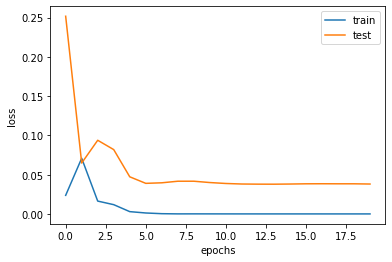

In [157]:
# Plotting the Loss Vs epochs :
plt.plot(opt.history['loss'],label='train')
plt.xlabel('epochs')
plt.plot(opt.history['val_loss'],label='test')
plt.ylabel('loss')
plt.legend()
plt.show()

Now the model is trained very well as there is very less difference of loss in training and test set.

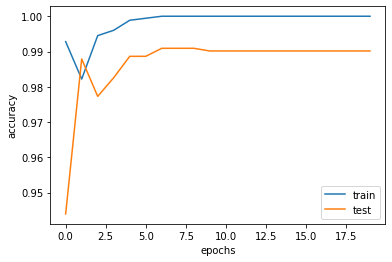

In [161]:
plt.plot(opt.history['acc'],label='train')
plt.plot(opt.history['val_acc'],label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Our model is trained optimally. Now we can use it to predict the output.

In [162]:
# Predicting the value for X_test_scaled.
Y_pred=model.predict(X_test_scaled).astype('int').flatten()
print(Y_pred)

[0 0 0 ... 0 0 0]


In [163]:
# Importing both classification report and confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix

cls = classification_report(Y_test,Y_pred)
cls_1 = confusion_matrix(Y_test,Y_pred)
print(cls)
print(cls_1)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1111
           1       1.00      0.32      0.48       209

    accuracy                           0.89      1320
   macro avg       0.94      0.66      0.71      1320
weighted avg       0.90      0.89      0.87      1320

[[1111    0]
 [ 143   66]]


As we can see the model gets high precision and recall value for 0 class but low recall for class 1 with a very low support no. This could be probably because of imbalance dataset.

In [0]:
# Saving the final model :
model.save("model.h5")